### Imports

In [445]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# EDA

In [446]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [447]:
df_train.head(15)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [448]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [449]:
df_train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [450]:
# Convert 'datetime' column to datetime format if it's not already

def convert_datetime(df):
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Extracting various components of datetime
    df['year'] = df['datetime'].dt.year
    df['year'] = df['year'] - np.min(df['year']-1)
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df = df.drop(columns = ['datetime'])

    return df

df_train = convert_datetime(df_train)
df_test = convert_datetime(df_test)

In [451]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,1,4


<Axes: xlabel='month', ylabel='count'>

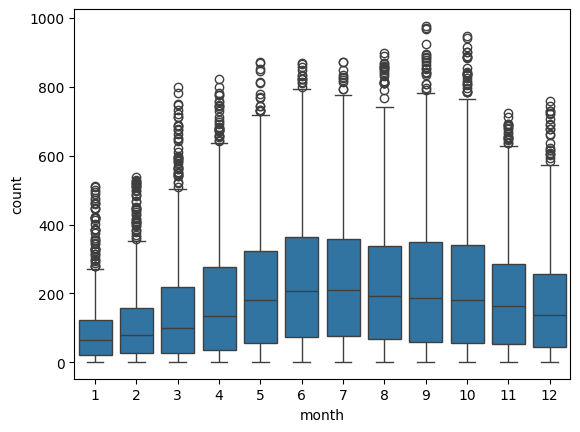

In [452]:
sns.boxplot(data = df_train, x = "month", y = "count")

<Axes: >

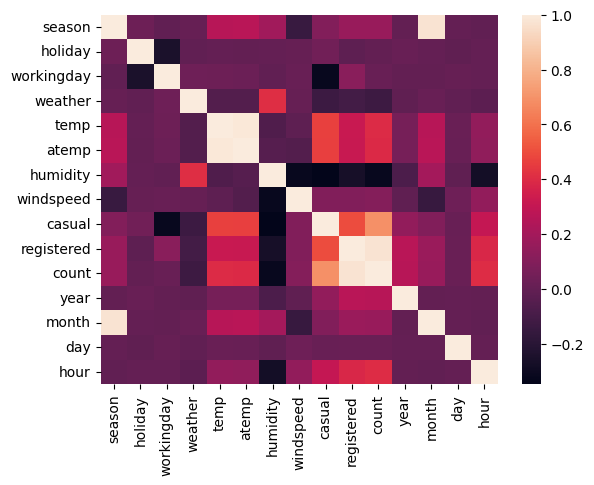

In [453]:
temp = df_train
corr = temp.corr()
sns.heatmap(corr)

<Axes: xlabel='hour', ylabel='count'>

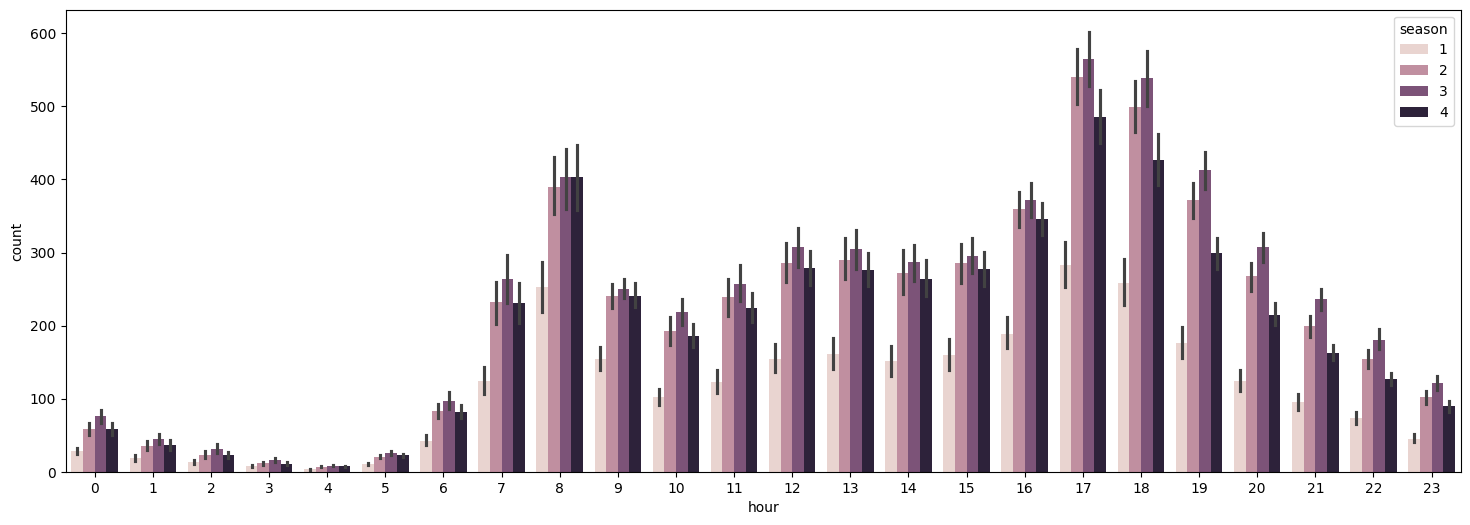

In [454]:
plt.figure(figsize=(18, 6))
sns.barplot(data = df_train, x="hour", y="count", hue="season")

<Axes: xlabel='hour', ylabel='count'>

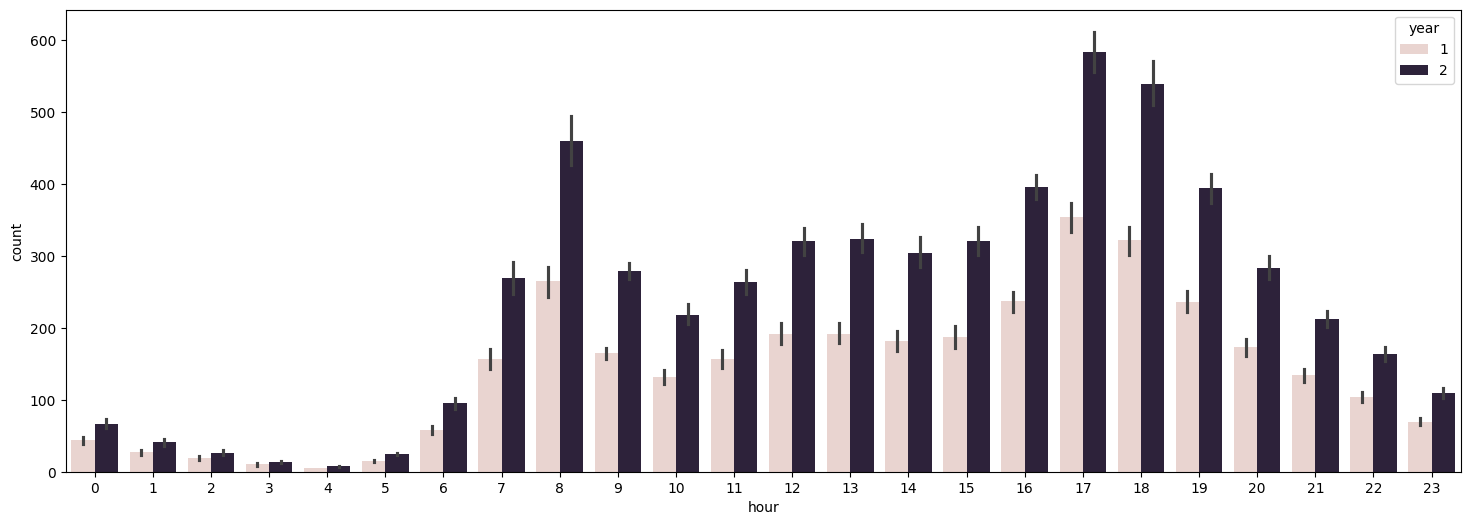

In [455]:
plt.figure(figsize=(18, 6))
sns.barplot(data = df_train, x="hour", y="count", hue="year")

<Axes: xlabel='weather', ylabel='count'>

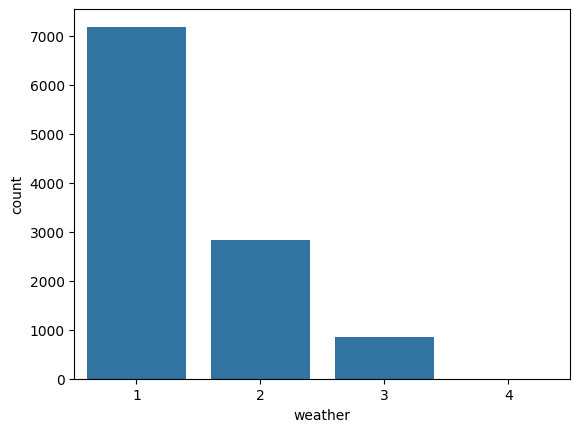

In [456]:
sns.countplot(data = df_train, x="weather")

<Axes: xlabel='weather', ylabel='count'>

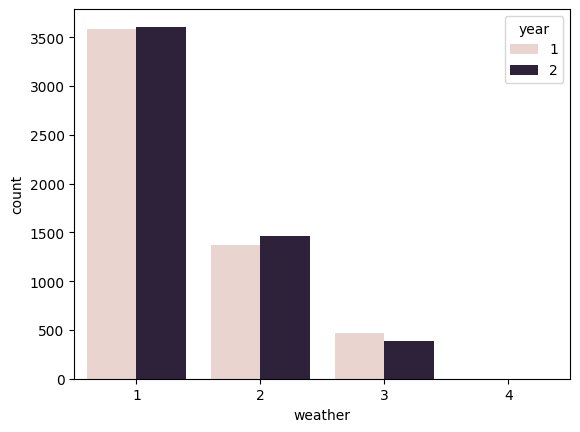

In [457]:
sns.countplot(data = df_train, x="weather", hue="year")

<Axes: xlabel='hour', ylabel='count'>

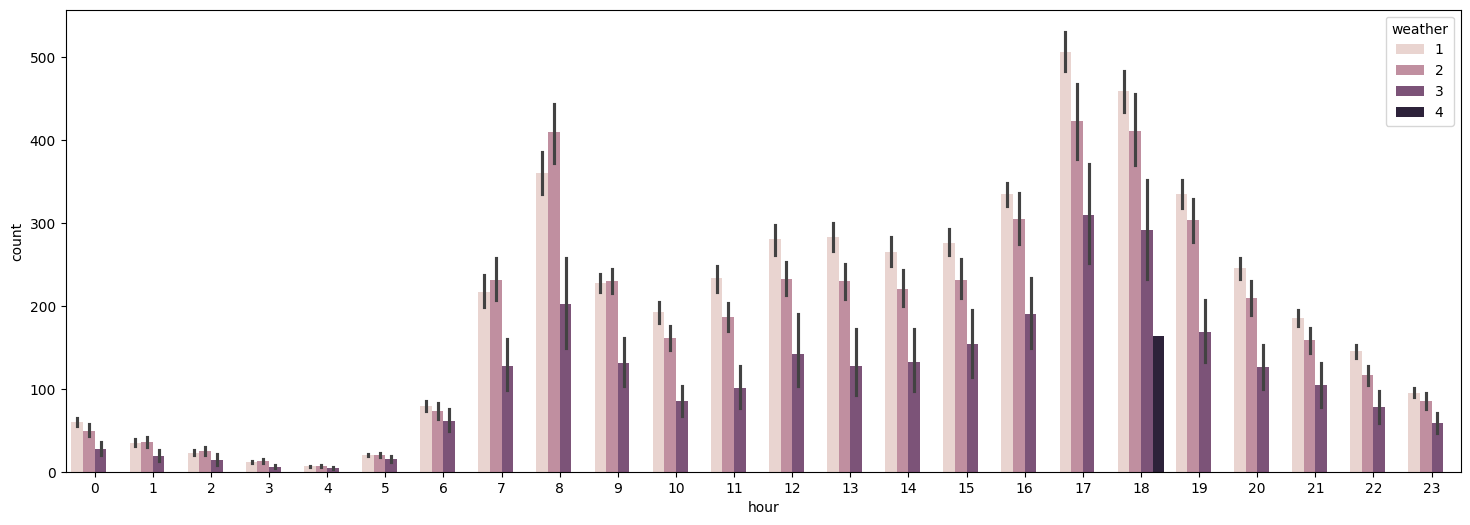

In [458]:
plt.figure(figsize=(18, 6))
sns.barplot(data = df_train, x="hour", y="count", hue="weather")

<Axes: xlabel='hour', ylabel='count'>

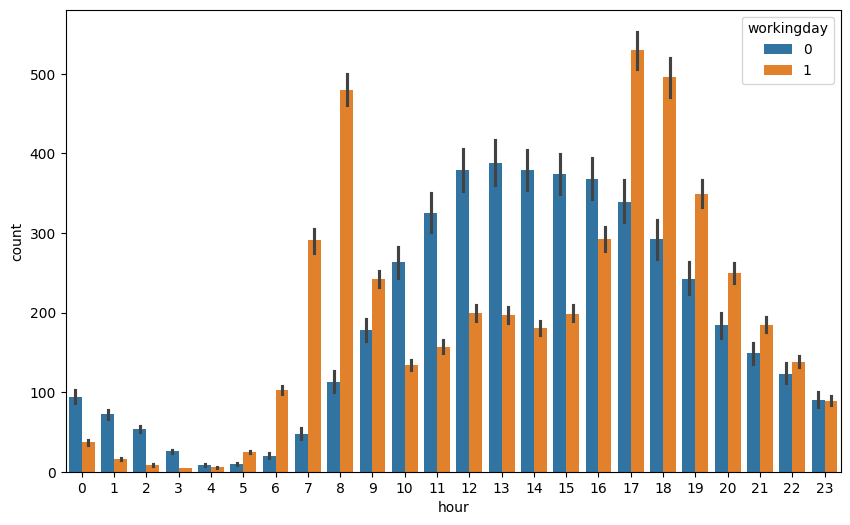

In [459]:
plt.figure(figsize=(10, 6))
sns.barplot(data = df_train, x = "hour", y = "count", hue="workingday")

<Axes: xlabel='month', ylabel='count'>

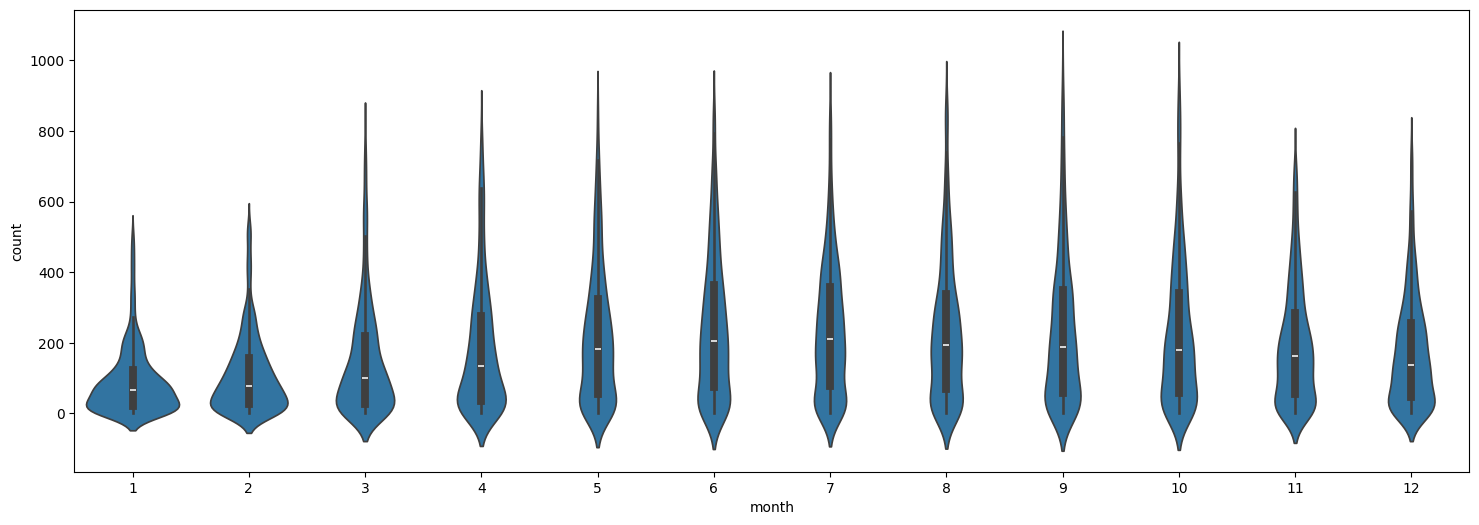

In [460]:
plt.figure(figsize=(18, 6))
sns.violinplot(data = df_train, x = "month", y = "count")

### Check stationarity of casual

### Check stationarity of registered

### Check stationarity of count

In [461]:
df_wind = df_test

# Random Forest

### Fill in wind speeds

In [462]:
columns = df_train.columns
target = ['count']
missing = target + ['casual', 'registered']
features = [col for col in columns if col not in missing]

In [463]:
df_wind = pd.concat([df_train[features], df_test])
df_wind.shape

(17379, 12)

In [464]:
df_wind['windspeed'] = pd.to_numeric(df_wind['windspeed'], errors='coerce')
df_wind['windspeed_interp'] = df_wind['windspeed'].replace(0, np.nan)
df_wind = df_wind[~df_wind.index.duplicated(keep='first')]

df_wind['windspeed_interp'] = df_wind['windspeed_interp'].interpolate(method='polynomial', order = 2)

In [465]:
np.sum(df_wind['windspeed_interp'].isna())

5

In [466]:
dataframe = pd.DataFrame()
for i in range(7, 0, -1):
   dataframe['wind, t-' + str(i)] = df_wind.windspeed_interp.shift(i)
   dataframe['wind, t+' + str(i)] = df_wind.windspeed_interp.shift(-i)

for i in range(2, 0, -1):
   dataframe['hum, t-' + str(i)] = df_wind.humidity.shift(i)
   dataframe['hum, t+' + str(i)] = df_wind.humidity.shift(-i)

for i in range(2, 0, -1):
   dataframe['atemp, t-' + str(i)] = df_wind.atemp.shift(i)
   dataframe['atemp, t+' + str(i)] = df_wind.atemp.shift(-i)

for i in range(2, 0, -1):
   dataframe['atemp, t-' + str(i)] = df_wind.atemp.shift(i)
   dataframe['atemp, t+' + str(i)] = df_wind.atemp.shift(-i)


final_data = pd.concat([df_wind, dataframe], axis=1)
final_data = final_data.fillna(method='bfill')
final_data = final_data.fillna(method='ffill')
final_data

/var/folders/bn/prwtql5x5sg0mbkxc6508fqm0000gn/T/ipykernel_2175/199049692.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_data = final_data.fillna(method='bfill')
/var/folders/bn/prwtql5x5sg0mbkxc6508fqm0000gn/T/ipykernel_2175/199049692.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_data = final_data.fillna(method='ffill')


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,...,"wind, t-1","wind, t+1","hum, t-2","hum, t+2","hum, t-1","hum, t+1","atemp, t-2","atemp, t+2","atemp, t-1","atemp, t+1"
0,1,0,0,1,9.84,14.395,81,0.0000,1,1,...,6.0032,6.0032,81.0,80.0,81.0,80.0,14.395,13.635,14.395,13.635
1,1,0,0,1,9.02,13.635,80,0.0000,1,1,...,6.0032,6.0032,81.0,75.0,81.0,80.0,14.395,14.395,14.395,13.635
2,1,0,0,1,9.02,13.635,80,0.0000,1,1,...,6.0032,6.0032,81.0,75.0,80.0,75.0,14.395,14.395,13.635,14.395
3,1,0,0,1,9.84,14.395,75,0.0000,1,1,...,6.0032,6.0032,80.0,75.0,80.0,75.0,13.635,12.880,13.635,14.395
4,1,0,0,1,9.84,14.395,75,0.0000,1,1,...,6.0032,6.0032,80.0,80.0,75.0,75.0,13.635,13.635,14.395,12.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2,12,...,23.9994,15.0013,50.0,61.0,50.0,57.0,20.455,15.910,19.695,17.425
10882,4,0,1,1,14.76,17.425,57,15.0013,2,12,...,26.0027,15.0013,50.0,61.0,50.0,61.0,19.695,17.425,19.695,15.910
10883,4,0,1,1,13.94,15.910,61,15.0013,2,12,...,15.0013,6.0032,50.0,66.0,57.0,61.0,19.695,16.665,17.425,17.425
10884,4,0,1,1,13.94,17.425,61,6.0032,2,12,...,15.0013,8.9981,57.0,66.0,61.0,66.0,17.425,16.665,15.910,16.665


In [467]:
final_data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'windspeed_interp', 'wind, t-7', 'wind, t+7', 'wind, t-6', 'wind, t+6',
       'wind, t-5', 'wind, t+5', 'wind, t-4', 'wind, t+4', 'wind, t-3',
       'wind, t+3', 'wind, t-2', 'wind, t+2', 'wind, t-1', 'wind, t+1',
       'hum, t-2', 'hum, t+2', 'hum, t-1', 'hum, t+1', 'atemp, t-2',
       'atemp, t+2', 'atemp, t-1', 'atemp, t+1'],
      dtype='object')

In [468]:
mask = final_data['windspeed'] == 0
df_missing_wind = final_data[mask]
df_with_wind = final_data[~mask]

In [469]:
wind = ['windspeed']
remove = wind + ['holiday', 'workingday', 'windspeed_interp', 'weather', 'yeaar', 'month', 'hour', 'season', 'day'] 
wind_features = [col for col in final_data.columns if col not in remove]

wind_train, wind_test = train_test_split(df_with_wind, test_size=0.2, random_state=10)
X_train, y_train = wind_train[wind_features], np.ravel(wind_train[wind])
X_test, y_test = wind_test[wind_features], np.ravel(wind_test[wind])

In [470]:
pipe1 = make_pipeline(StandardScaler(), MLPRegressor(verbose=True))
pipe1.fit(X_train, y_train)

pipe2 = make_pipeline(StandardScaler(), RandomForestRegressor(verbose=True))
pipe2.fit(X_train, y_train)

Iteration 1, loss = 109.47533621
Iteration 2, loss = 70.40356775
Iteration 3, loss = 38.52933636
Iteration 4, loss = 24.26631890
Iteration 5, loss = 19.00192631
Iteration 6, loss = 16.27511815
Iteration 7, loss = 14.63882875
Iteration 8, loss = 13.62218334
Iteration 9, loss = 12.91561736
Iteration 10, loss = 12.39648611
Iteration 11, loss = 11.97457128
Iteration 12, loss = 11.59740396
Iteration 13, loss = 11.26635199
Iteration 14, loss = 10.95310670
Iteration 15, loss = 10.67407328
Iteration 16, loss = 10.41432460
Iteration 17, loss = 10.14599416
Iteration 18, loss = 9.90056770
Iteration 19, loss = 9.67145428
Iteration 20, loss = 9.42375784
Iteration 21, loss = 9.21257869
Iteration 22, loss = 8.98362472
Iteration 23, loss = 8.78680562
Iteration 24, loss = 8.57975962
Iteration 25, loss = 8.39395420
Iteration 26, loss = 8.20132573
Iteration 27, loss = 8.03823189
Iteration 28, loss = 7.88669407
Iteration 29, loss = 7.76396672
Iteration 30, loss = 7.63879029
Iteration 31, loss = 7.50808234

/Users/francescobraicovich/Documents/general/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(verbose=True))])

In [471]:
predictions1 = pipe1.predict(X_test)
predictions2 = pipe2.predict(X_test)

mae1 = mean_absolute_error(y_test, predictions1)
mae2 = mean_absolute_error(y_test, predictions2)

# Create a DataFrame with features and their importances
feature_importance_df = pd.DataFrame(zip(X_train.columns, pipe2[1].feature_importances_), columns=['Feature', 'Importance'])
# Sort the DataFrame by the 'Importance' column in descending order
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df_sorted)

print("MLP - Mean Absolute Error (MAE):", mae1)
print("RF - Mean Absolute Error (MAE):", mae2)

print("MLP - Score is: ", pipe1.score(X_test, y_test))
print("RF - Score is: ", pipe2.score(X_test, y_test))

       Feature  Importance
16   wind, t-1    0.463547
17   wind, t+1    0.271939
15   wind, t+2    0.019386
14   wind, t-2    0.019184
13   wind, t+3    0.016792
12   wind, t-3    0.014331
11   wind, t+4    0.013358
9    wind, t+5    0.013349
19    hum, t+2    0.012536
5    wind, t+7    0.012127
7    wind, t+6    0.012102
4    wind, t-7    0.011906
6    wind, t-6    0.011901
18    hum, t-2    0.011854
8    wind, t-5    0.011828
10   wind, t-4    0.011570
2     humidity    0.010791
20    hum, t-1    0.010362
21    hum, t+1    0.009774
22  atemp, t-2    0.008470
23  atemp, t+2    0.007242
1        atemp    0.006952
24  atemp, t-1    0.005918
25  atemp, t+1    0.005329
0         temp    0.005130
3         year    0.002324
MLP - Mean Absolute Error (MAE): 2.7045718735215694
RF - Mean Absolute Error (MAE): 2.817117546736292
MLP - Score is:  0.7116148864894237
RF - Score is:  0.6872530471416887


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [472]:
final_prediction = (predictions1 + predictions2)/2
mae = mean_absolute_error(y_test, final_prediction)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 2.701104964988321


In [473]:
wind_test['predictions'] = final_prediction
result_analyse = wind_test[['windspeed', 'windspeed_interp', 'predictions']].copy()

In [474]:
del X_train, X_test, y_train, y_test

### Naive random forest regressor

In [475]:
train, test = train_test_split(df_train, test_size=0.2, random_state=10)

X_train, y_train = train[features], np.ravel(train[target])
X_test, y_test = test[features], np.ravel(test[target])

regr = RandomForestRegressor(verbose = True)
regr.fit(X_train, y_train)


# Create a DataFrame with features and their importances
feature_importance_df = pd.DataFrame(zip(X_train.columns, regr.feature_importances_), columns=['Feature', 'Importance'])

# Print the DataFrame
print(feature_importance_df)
# Make predictions on the test set
predictions = regr.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s


       Feature  Importance
0       season    0.009928
1      holiday    0.002295
2   workingday    0.072684
3      weather    0.014746
4         temp    0.078556
5        atemp    0.032734
6     humidity    0.031266
7    windspeed    0.009188
8         year    0.083442
9        month    0.041310
10         day    0.012523
11        hour    0.611328
Mean Absolute Error (MAE): 26.787309458218548


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


# ARIMA and SARIMA